In [1]:
# Importing library
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pathlib import Path

In [2]:
# Loading the dataset
dataco_df = pd.read_csv("Resources/DataCoSupplyChainDataset.csv", encoding= 'ISO-8859-1')
#dataco_df = pd.read_csv(file_path, encodig = 'ISO-8859-1')
dataco_df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [3]:
# Get the names of the columns
dataco_df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [4]:
# Check for Null or NaNs
dataco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [5]:
# Creating a clean DataFrame after dropping null values
clean_dataco_df = dataco_df.dropna(axis = 'columns')
clean_dataco_df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order State,Order Status,Product Card Id,Product Category Id,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,Java Occidental,COMPLETE,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,Rajastán,PENDING,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,Rajastán,CLOSED,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,Queensland,COMPLETE,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,Queensland,PENDING_PAYMENT,1360,73,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [6]:
clean_dataco_df.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Department Id,Latitude,Longitude,...,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Card Id,Product Category Id,Product Price,Product Status
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.0
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,5.443460,29.719955,-84.915675,...,141.232550,0.120647,2.127638,203.772096,183.107609,21.974989,692.509764,31.851451,141.232550,0.0
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,1.629246,9.813646,21.433241,...,139.732492,0.466796,1.453451,132.273077,120.043670,104.433526,336.446807,15.640064,139.732492,0.0
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,2.000000,-33.937553,-158.025986,...,9.990000,-2.750000,1.000000,9.990000,7.490000,-4274.979980,19.000000,2.000000,9.990000,0.0
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,4.000000,18.265432,-98.446312,...,50.000000,0.080000,1.000000,119.980003,104.379997,7.000000,403.000000,18.000000,50.000000,0.0
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,5.000000,33.144863,-76.847908,...,59.990002,0.270000,1.000000,199.919998,163.990005,31.520000,627.000000,29.000000,59.990002,0.0
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,7.000000,39.279617,-66.370583,...,199.990005,0.360000,3.000000,299.950012,247.399994,64.800003,1004.000000,45.000000,199.990005,0.0
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,12.000000,48.781933,115.263077,...,1999.989990,0.500000,5.000000,1999.989990,1939.989990,911.799988,1363.000000,76.000000,1999.989990,0.0


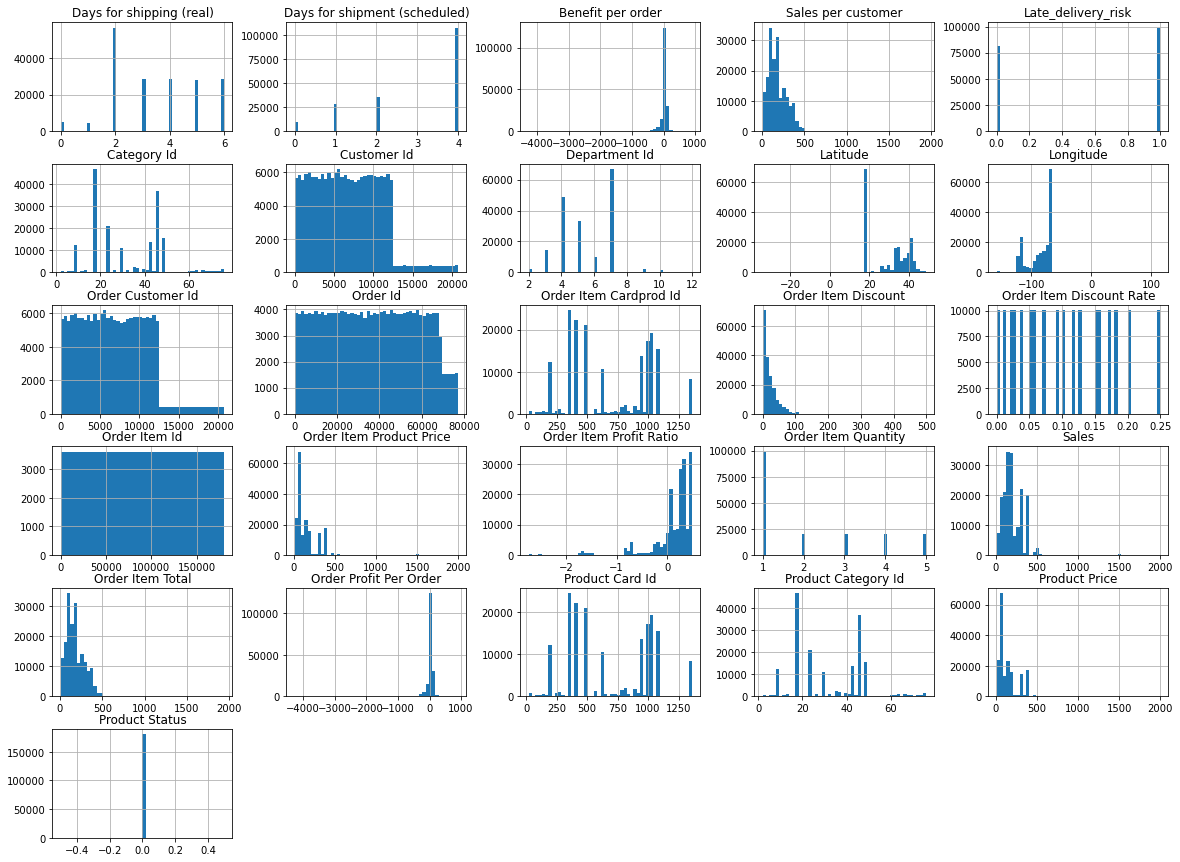

In [7]:
import matplotlib.pyplot as plt
clean_dataco_df.hist(bins = 50, figsize = (20, 15))
plt.show()

<AxesSubplot:xlabel='Days for shipment (scheduled)', ylabel='Days for shipping (real)'>

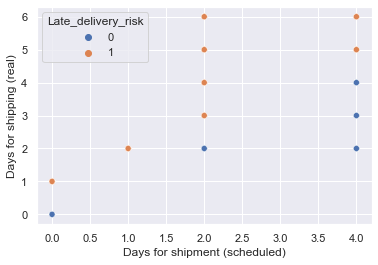

In [8]:
# plot varible analysis for delivery risk where 0 = on time and 1 = late delivery
sns.set()
sns.scatterplot(x = "Days for shipment (scheduled)", 
                  y = "Days for shipping (real)", hue = "Late_delivery_risk", data = clean_dataco_df)

In [9]:
### Splitting dataset

In [10]:
# Get the names of the columns
clean_dataco_df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Password', 'Customer Segment', 'Customer State',
       'Customer Street', 'Department Id', 'Department Name', 'Latitude',
       'Longitude', 'Market', 'Order City', 'Order Country',
       'Order Customer Id', 'order date (DateOrders)', 'Order Id',
       'Order Item Cardprod Id', 'Order Item Discount',
       'Order Item Discount Rate', 'Order Item Id', 'Order Item Product Price',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Profit Per Order', 'Order Region',
       'Order State', 'Order Status', 'Product Card Id', 'Product Category Id',
       'Product Image', 'Product Name', 'Product Price', 'Product Status',
     

In [11]:
# Creating shipment dataset
shipment = ['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)', 'Late_delivery_risk', 
            'Benefit per order', 'Sales per customer', 'Latitude', 'Longitude', 'Shipping Mode', 
            'Order Id', 'Order Status', 'Order Region', 'Order Country', 'Order City', 'Market', 
            'Delivery Status']
shipment_df = clean_dataco_df[shipment]
shipment_df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Late_delivery_risk,Benefit per order,Sales per customer,Latitude,Longitude,Shipping Mode,Order Id,Order Status,Order Region,Order Country,Order City,Market,Delivery Status
0,DEBIT,3,4,0,91.250000,314.640015,18.251453,-66.037056,Standard Class,77202,COMPLETE,Southeast Asia,Indonesia,Bekasi,Pacific Asia,Advance shipping
1,TRANSFER,5,4,1,-249.089996,311.359985,18.279451,-66.037064,Standard Class,75939,PENDING,South Asia,India,Bikaner,Pacific Asia,Late delivery
2,CASH,4,4,0,-247.779999,309.720001,37.292233,-121.881279,Standard Class,75938,CLOSED,South Asia,India,Bikaner,Pacific Asia,Shipping on time
3,DEBIT,3,4,0,22.860001,304.809998,34.125946,-118.291016,Standard Class,75937,COMPLETE,Oceania,Australia,Townsville,Pacific Asia,Advance shipping
4,PAYMENT,2,4,0,134.210007,298.250000,18.253769,-66.037048,Standard Class,75936,PENDING_PAYMENT,Oceania,Australia,Townsville,Pacific Asia,Advance shipping


In [26]:
# Delivery Status
pivot_df = pd.pivot_table(shipment_df, 
                                 values = 'Order Id', 
                                index = 'Market', 
                                columns = 'Delivery Status', 
                                aggfunc = 'count')
pivot_df

Delivery Status,Advance shipping,Late delivery,Shipping canceled,Shipping on time
Market,,,,
Africa,2645,6340,460,2169
Europe,11604,27743,2162,8743
LATAM,12039,28044,2285,9226
Pacific Asia,9473,22712,1675,7400
USCA,5831,14138,1172,4658


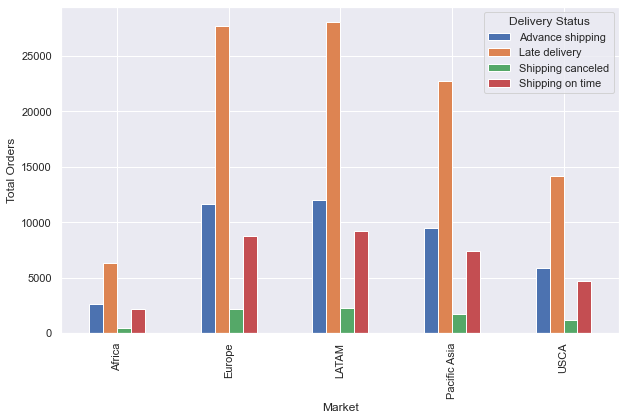

In [27]:
# creating the plot
ax = pivot_df.plot(kind = 'bar')

fig = ax.get_figure()

fig.set_size_inches(10, 6)

ax.set_xlabel('Market')
ax.set_ylabel('Total Orders')

plt.show()


<Figure size 720x432 with 0 Axes>

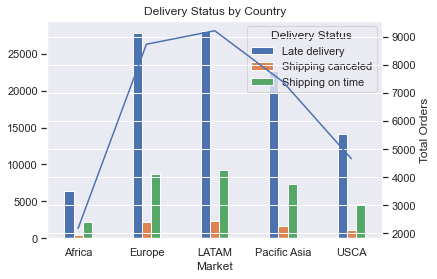

In [32]:
# bar and line

d1 = pivot_df.iloc[:, [1, 2, 3]]
d2 = pivot_df['Shipping on time']


d1.plot(kind = 'bar', width = 0.40)
d2.plot(secondary_y = True)

ax = plt.gca()
ax.set_title('Delivery Status by Country')
ax.set_ylabel('Total Orders')

plt.show()


In [33]:
# Creating finance dataset
finance = ['Order Country', 'Market', 'Benefit per order', 'Sales per customer', 'Order Item Discount', 
           'Order Item Discount Rate', 'Order Item Product Price','Order Item Profit Ratio']
finance_df = clean_dataco_df[finance]
finance_df.head()

,Order Country,Market,Benefit per order,Sales per customer,Order Item Discount,Order Item Discount Rate,Order Item Product Price,Order Item Profit Ratio
0,Indonesia,Pacific Asia,91.250000,314.640015,13.110000,0.04,327.75,0.29
1,India,Pacific Asia,-249.089996,311.359985,16.389999,0.05,327.75,-0.80
2,India,Pacific Asia,-247.779999,309.720001,18.030001,0.06,327.75,-0.80
3,Australia,Pacific Asia,22.860001,304.809998,22.940001,0.07,327.75,0.08
4,Australia,Pacific Asia,134.210007,298.250000,29.500000,0.09,327.75,0.45


In [34]:
# Market demand
demand_df = finance_df.groupby('Market').sum()['Sales per customer']
demand_df = demand_df.reset_index()
demand_df.head()

,Market,Sales per customer
0,Africa,2.061679e+06
1,Europe,9.769198e+06
2,LATAM,9.235762e+06
3,Pacific Asia,7.434263e+06
4,USCA,4.553500e+06


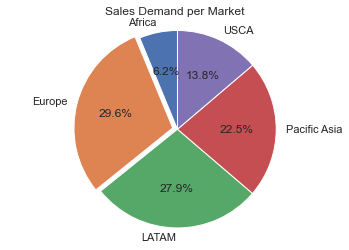

In [35]:
# creating the plot
market = demand_df['Market']
sales = demand_df['Sales per customer']
explode = (0, 0.05, 0, 0, 0)

plt.title('Sales Demand per Market')
plt.pie(sales, explode = explode, labels = market, 
       autopct = '%1.1f%%', startangle = 90)
plt.axis('equal')
plt.show()